<h2>Regressão Linear</h2>
<h3>Prevendo o Preço de Casas</h3>
<p>Modelo de Regressão Linear Múltipla, ou seja, que utiliza mais de uma variável preditora.</p>

<h4>1. Preparando os dados</h4>
Utilizando o dataset boston house da biblioteca sklearn, nela existem informações sobre casas, como número de quartos por exemplo, e a relação com o preço.

In [1]:
#bibliotecas necessárias
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [5]:
#usando o dataset boston house, que está disponível no scikit-learn
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
type(boston)#data bunch

sklearn.utils.Bunch

In [7]:
#estrutura do dataset
boston.data.shape

(506, 13)

In [8]:
#verificando a estrutura descritiva do dataset
#resumo completo
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
print(boston.feature_names)#descrição de cada coluna
#as colunas representam as características (atributos) da casa

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Converter o dataset para modelo Pandas

In [11]:
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Converter o rótulo das colunas de números para nomes

In [12]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Criando uma coluna com os preços das casas

In [14]:
#no dataset o target contém os preços das casas
boston.target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [15]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<h4>2. Iniciando a Criação do Modelo</h4>

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
#criando o atributo X para o treinamento, contudo não incluíndo os dados de preço
x = df.drop('PRICE', axis = 1)

In [18]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
#criando o df com os valores das casas, eixo y
y = df.PRICE

In [20]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

Visualizando os dados

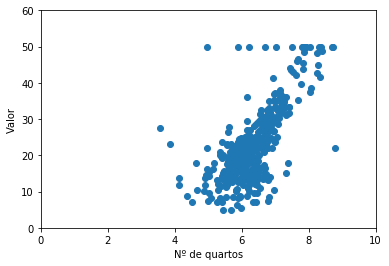

In [27]:
#visualizando a relação entre o nº de quartos com o valor
plt.scatter(df.RM, y)#df.RM contém o número de quartos de cada casa
plt.xlabel('Nº de quartos')
plt.ylabel('Valor')
plt.axis([0,10,0,60])
plt.show()

In [28]:
#criando o modelo
modelo = LinearRegression()

In [29]:
type(modelo)

sklearn.linear_model.base.LinearRegression

In [30]:
#treinando o modelo
#aqui os dados não foram divididos em dados de treino e teste
#foram usados todos os dados do dataset para treinar o modelo
modelo.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
#coeficiente de erro
print('Coeficiente: ', modelo.intercept_)
print('Número de Coeficientes: ', len(modelo.coef_))

Coeficiente:  36.45948838509015
Número de Coeficientes:  13


Vericando a relação da taxa de erro com o número de variáveis utilizadas no treino

In [34]:
#analisando a tx de erro, considerando TODAS AS VARIÁVEIS
erro = np.mean((df.PRICE - modelo.predict(x))**2)
print("taxa de erro: ",erro)

taxa de erro:  21.89483118172922


In [36]:
#analisando a taxa de erro considerando apenas 1 atributo
model = LinearRegression()
model.fit(x[['PTRATIO']], df.PRICE)
erro1 = np.mean((df.PRICE - model.predict(x[['PTRATIO']]))**2)
print('Taxa de erro: ',erro1)

Taxa de erro:  62.65220001376927


A tx de erro do modelo, aumento ao utilizar apenas uma variável.

<h4>Dividindo os dados em TREINO e TESTE</h4>

In [38]:
#dividindo os dados manualmente
x_treino = x[:-50]
x_teste = x[-50:]

y_treino = y[:-50]
y_teste = y[-50:]

print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(456, 13) (50, 13) (456,) (50,)


Utilizando o método recomendado para dividir os dados em TREINO e TESTE

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
#0.3 ou 30% vai pra teste | random_state para que a divisão seja totalmente randõomica
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state = 5)

In [41]:
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(354, 13) (152, 13) (354,) (152,)


Treinando o modelo com os novos dados

In [42]:
mdl = LinearRegression()

In [43]:
mdl.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Fazendo a previsão

In [44]:
pred_treino = mdl.predict(x_treino)
pred_teste = mdl.predict(x_teste)

Comparando as previsçoes do modelo

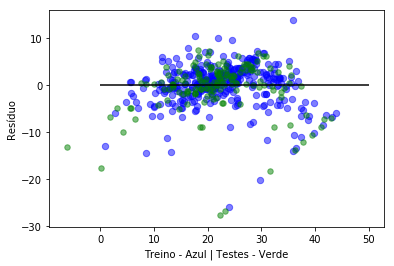

In [45]:
plt.scatter(mdl.predict(x_treino), mdl.predict(x_treino)-y_treino, c = 'b', s=40, alpha = 0.5)
plt.scatter(mdl.predict(x_teste), mdl.predict(x_teste)-y_teste, c='g', s=30, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=50)
plt.ylabel('Resíduo')
plt.xlabel('Treino - Azul | Testes - Verde')
plt.show()